In [23]:
bodies = np.array([[-1.,0,2],[2,-10,-7],[4,-8,8],[3,5,-1]]) #ex1
cou = []
for i in range(3):
  print(sum(b[i] for b in bodies)/4)
  cou.append(sum(b[i] for b in bodies)/4)
cou = np.array(cou)
bodies[0] = bodies[0] - cou
bodies[1] = bodies[1] - cou
bodies[2] = bodies[2] - cou
bodies[3] = bodies[3] - cou
bodies

2.0
-3.25
0.5


array([[-3.  ,  3.25,  1.5 ],
       [ 0.  , -6.75, -7.5 ],
       [ 2.  , -4.75,  7.5 ],
       [ 1.  ,  8.25, -1.5 ]])

In [0]:
def delta(x,positions):
  res = positions-x
  res = (res>0)*1+(res<0)*-1
  # print (res)
  return sum(res)

def step(p):
  
  v = np.array([0,0,0,0])
  start = deepcopy(p)
  #update gravity
  counter = 0
  while True:
    counter += 1
    for i in range(4):
      v[i] = v[i] + delta(p[i],p)
    for i in range(4):
      p[i]+= v[i]
    # update position
    if all(p==start) and all(v==np.array([0,0,0,0])): return counter
    

In [122]:
bodies = np.array([[-1.,0,2],[2,-10,-7],[4,-8,8],[3,5,-1]])
bodies = [[14,4,5],[12,10,8],[1,7,-10],[16,-5,3]]
#bodies = [[-8,-10,0],[5,5,10],[2,-7,3],[9,-8,-3]]
res = np.array([step(np.array([b[i] for b in bodies]))for i in range(3)])
res 


array([167624, 135024, 231614])

In [0]:
res= res/2

In [88]:
np.product(res)

2772.0

In [0]:
from functools import reduce
from math import sqrt
def factors(n):
        step = 2 if n%2 else 1
        return set(reduce(list.__add__,
                    ([i, n//i] for i in range(1, int(sqrt(n))+1, step) if n % i == 0)))

In [101]:
factors(167624)&factors(135024)&factors(231614)

{1, 2}

In [0]:
res = np.array([167624,135024,231614])

In [125]:
for i in range(1000000000,9000000000):
  if i*231614 % 135024 == 0:
    if i*231614 % 167624 == 0:
      print(i)
      break

1414578936


In [120]:
for i in range(1,1000000):
  if i*5898 % 4702 == 0:
    if i*5898 % 2028 == 0:
      print(i)
      break

794638


In [126]:
1414578936*231614

327636285682704

In [121]:
794638*5898

4686774924

22176

In [0]:
import numpy as np
from copy import deepcopy

def compare(x,y):
  for i in range(len(x)):
    for key in ['pos','vel']:
      if any(x[i][key]!=y[i][key]):
        return False
  return True

def getdelta(x,y):
  res = y['pos']-x['pos']
  res = (res>0)*1+(res<0)*-1
  # print (res)
  return res
def gettotaldis(x,y):
  res = y['pos']-x['pos']
  res = sum(abs(res))
  # print (res)
  return res
def getdis(g):
  res = []
  for x in g:
    res.append(sum([gettotaldis(x,y) for y in g]))
  return sum(res)/2

In [0]:
#bodies = [[14,4,5],[12,10,8],[1,7,-10],[16,-5,3]] #input
#bodies = [[-1,0,2],[2,-10,-7],[4,-8,8],[3,5,-1]] #ex1
#bodies = [[-8,-10,0],[5,5,10],[2,-7,3],[9,-8,-3]] #ex2
repeatpot = [[0],[0],[0],[0]]
repeatkin = [[0],[0],[0],[0]]
repeattot = [[0],[0],[0],[0]]

stop = []
g = []
for b in bodies:
  planet = {
      'pos':np.array(b),
      'vel':np.array([0,0,0]),
      'pot':sum(abs(np.array(b))),
      'kin':0,
      'tot':0,
  }
  g.append(planet)
start = deepcopy(g)
total_energy = 0

stats = {'1kin':[],
         '1pot':[],
         '1tot':[],
         'kin':[],
         'pot':[],
         'tot':[],
         'totaldis':[],
         'totalen':[]}

61.0

In [0]:
for i in range(1,5800):
  # apply gravity
  for x in g:
    for y in g:
      x['vel'] += getdelta(x,y)
  # apply velocity and calculate energies
  for x in g:
    x['pos']+=x['vel']
    x['pot']= sum(abs(x['pos']))
    x['kin']= sum(abs(x['vel']))
    x['tot']= x['pot']*x['kin']
    

  stats['1kin'].append(g[0]['kin'])
  stats['1pot'].append(g[0]['pot'])
  stats['1tot'].append(g[0]['tot'])
  stats['kin'].append(sum([x['kin'] for x in g]))
  stats['pot'].append(sum([x['pot'] for x in g]))
  stats['tot'].append(sum([x['tot'] for x in g]))
  stats['totaldis'].append(getdis(g))
  stats['totalen'].append(stats['totaldis'][-1]+stats['kin'][-1])

  if i%100000 == 0: print(i)

  if sum([x['tot'] for x in g])==total_energy:
    print('interest',i)
  #   stop.append(i)
  #   if compare(start,g): print ('found',i)

  for b in range(0,4):
    if g[b]['pot']==sum(abs(np.array(bodies[b]))):repeatpot[b].append(i)
    if g[b]['kin']==0:repeatkin[b].append(i)
    if g[b]['tot']==0:repeattot[b].append(i)
    #if g[b]['tot']==sum(abs(np.array(bodies[b]))):repeattot[b].append(i)

# print(sum([x['tot'] for x in g])) # for puzzle 1 after 1000 runs


interest 1386
interest 2772
interest 4158
interest 5544


In [0]:
sol = 4686774924
sol = 2772
for i in repeatpot:
  print (list((y-x) for x,y in zip(i,i[1:])))
print(repeatpot)

[10, 35, 1, 7, 31, 25, 10, 19, 50, 7, 1, 18, 35, 1, 4, 26, 28, 8, 37, 13, 26, 28, 1, 25, 31, 25, 1, 28, 26, 13, 37, 8, 28, 26, 4, 1, 35, 18, 1, 7, 50, 19, 10, 25, 31, 7, 1, 35, 10, 1, 10, 35, 1, 7, 31, 25, 10, 19, 50, 7, 1, 18, 35, 1, 4, 26, 28, 8, 37, 13, 26, 28, 1, 25, 31, 25, 1, 28, 26, 13, 37, 8, 28, 26, 4, 1, 35, 18, 1, 7, 50, 19, 10, 25, 31, 7, 1, 35, 10, 1, 10, 35, 1, 7, 31, 25, 10, 19, 50, 7, 1, 18, 35, 1, 4, 26, 28, 8, 37, 13, 26, 28, 1, 25, 31, 25, 1, 28, 26, 13, 37, 8, 28, 26, 4, 1, 35, 18, 1, 7, 50, 19, 10, 25, 31, 7, 1, 35, 10, 1, 10]
[83, 1, 56, 27, 225, 140, 84, 83, 533, 83, 141, 83, 533, 83, 84, 140, 225, 27, 56, 1, 83, 1]
[215, 224, 45, 532, 39, 45, 132, 307, 132, 45, 39, 532, 45, 224, 215, 1]
[17, 1, 11, 45, 10, 57, 54, 38, 8, 9, 28, 12, 18, 18, 66, 28, 1, 27, 1, 8, 9, 8, 1, 27, 1, 28, 66, 18, 18, 12, 28, 9, 8, 38, 54, 57, 10, 45, 11, 1, 17, 1, 17, 1, 11, 45, 10, 57, 54, 38, 8, 9, 28, 12, 18, 18, 66, 28, 1, 27, 1, 8, 9, 8, 1, 27, 1, 28, 66, 18, 18, 12, 28, 9, 8, 38, 5

In [0]:
for i in repeatkin:
  print (list((y-x) for x,y in zip(i,i[1:])))
print(repeatkin)

[462, 462, 462, 462, 462, 462]
[1125, 261, 261, 1125]
[308, 308, 154, 308, 308, 308, 308, 154, 308, 308]
[261, 201, 201, 261, 261, 201, 201, 261, 261, 201, 201, 261]
[[0, 462, 924, 1386, 1848, 2310, 2772], [0, 1125, 1386, 1647, 2772], [0, 308, 616, 770, 1078, 1386, 1694, 2002, 2156, 2464, 2772], [0, 261, 462, 663, 924, 1185, 1386, 1587, 1848, 2109, 2310, 2511, 2772]]


In [0]:
for i in repeattot:
  print (list(y-x for x,y in zip(i,i[1:])))
print(repeattot)

[462, 462, 462, 462, 462, 462]
[1125, 261, 261, 1125]
[308, 308, 154, 308, 308, 308, 308, 154, 308, 308]
[261, 201, 201, 261, 261, 201, 201, 261, 261, 201, 201, 261]
[[0, 462, 924, 1386, 1848, 2310, 2772], [0, 1125, 1386, 1647, 2772], [0, 308, 616, 770, 1078, 1386, 1694, 2002, 2156, 2464, 2772], [0, 261, 462, 663, 924, 1185, 1386, 1587, 1848, 2109, 2310, 2511, 2772]]


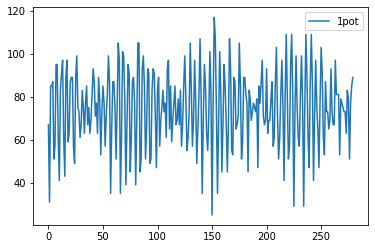

In [0]:
import matplotlib.pyplot as plt
# plt.plot(totalt,label='1pot')
plt.plot(stats['totaldis'][:280],label='1pot')
#plt.plot(totaltot,label='1tot')
plt.legend()
plt.show()



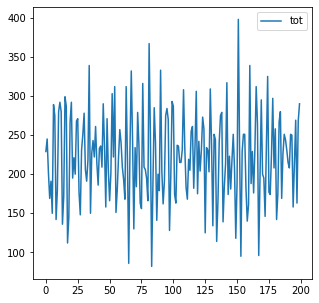

In [0]:
import matplotlib.pyplot as plt
#plt.plot(stats['kin'][:400],label='kin')
#plt.plot(stats['pot'][:400],label='pot')
plt.plot(stats['tot'][:200],label='tot')
plt.rcParams["figure.figsize"] = (5,5)
plt.legend()
plt.show()

In [0]:
len([s for s in stats['tot'] if s==299])

9

In [0]:
len([s for s in stats['kin'] if s == 24])

331

In [0]:
len([s for s in stats['pot']if s == 35])

351

In [0]:
[for x in g]

286

In [0]:
sum([230, 277, 270, 348, 113, 148, 147, 114, 347, 270, 277, 231])

2772

In [0]:
2772/230

12.052173913043479

In [0]:
2720/923

2.946912242686891

In [0]:
0
615
1231
1538
2154
2770

61

In [0]:
1231-615

616

In [0]:
1538-1231

307

In [0]:
2154-1538

616

In [0]:
2770-2154

616

In [0]:
0
922
923
1846
1847
2770
2771

2771

In [0]:
2770-1846

924

In [0]:
18

In [0]:
total_energy

51

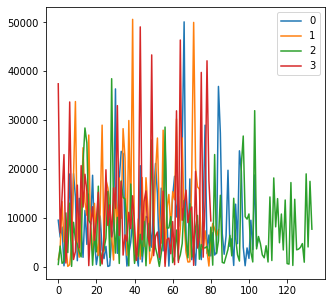

In [0]:
import matplotlib.pyplot as plt
for a,i in enumerate(repeattot):
  plt.plot(list(y-x for x,y in zip(i,i[1:])),label=a)
plt.legend()
plt.show()

In [0]:
bodies = [[-1,0,2],[2,-10,-7],[4,-8,8],[3,5,-1]] #ex1
cou = []
for i in range(3):
  print(sum(b[i] for b in bodies)/4)
  cou.append(sum(b[i] for b in bodies)/4)

2.0
-3.25
0.5


In [0]:
[[-1,0,2],[2,-10,-7],[4,-8,8],[3,5,-1]]